In [5]:
import pandas as pd
import spacy

# Load the tweet data
df = pd.read_csv('C:/Users/HP/Downloads/la (1).csv')  # Adjust path if needed
df.dropna(inplace=True)

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

# Define gender-specific keyword sets
male_keywords = {
    "abbot", "actor", "actors", "author", "bachelor", "bachelors", "ballerino", "baron",
    "beau", "beaus", "benefactor", "bf", "bfs", "bloke", "blokes", "boars", "boy", "boyfriend",
    "boyfriends", "boyhood", "boys", "brethren", "bridegroom", "bridegrooms", "bro", "brother",
    "brotherhood", "brotherly", "brothers", "businessman", "businessmen", "chairman", "chairmen",
    "chap", "chaps", "conductor", "congressman", "congressmen", "council-man", "council-men",
    "councilman", "councilmen", "count", "countryman", "countrymen", "czar", "dad", "dada", 
    "daddies", "daddy", "dads", "dream boy", "dude", "dudes", "duke", "dukes", "earl", "emperor", 
    "enchanter", "enchanters", "father", "father-in-law", "fatherhood", "fathers", "fella", 
    "fellas", "fiance", "fiances", "founder", "founders", "fraternal", "fraternities", 
    "fraternity", "gay", "gays", "gentleman", "gentlemen", "giant", "god", "gods", "governor",
    "gramps", "grand-fathers", "grand-nephew", "grand-nephews", "grand-son", "grand-sons",
    "grandfather", "grandfathers", "grandnephew", "grandpa", "grandpas", "grandson", "grandsons",
    "groom", "grooms", "guy", "handyman", "he", "headmaster", "heir", "heirs", "hero", "heroes", 
    "he’s", "him", "himself", "his", "homeboy", "homeboys", "horsemen", "host", "hosts", 
    "hubbies", "hubby", "hunter", "hunters", "husband", "husbands", "instructor", "john doe", 
    "king", "knight", "knights", "lad", "lads", "landlord", "landlords", "lords", "macho", 
    "male", "males", "man", "manager", "manhood", "manly", "manservant", "masculine", 
    "masculinity", "masseurs", "masters", "mayor", "men", "menfolk", "milk-man", "milkmen", 
    "millionaire", "monk", "monks", "mr", "murderer", "murderers", "negro", "nephew", "nephews", 
    "nobleman", "noblemen", "pa", "papa", "papas", "papi", "pappies", "pappy", "paternal", 
    "patriachy", "patriarch", "patron", "patrons", "peer", "pimp", "pimps", "poet", "policeman", 
    "policemen", "postman", "postmaster", "priest", "prince", "princes", "proprietor", 
    "prostate cancer", "salesman", "schoolboy", "schoolboys", "shepherd", "shepherds", "sir", 
    "sire", "sires", "sirs", "son", "son-in-law", "songster", "songsters", "sons", "sons-in-law", 
    "sorcerer", "spokesman", "spokesmen", "stags", "statesman", "statesmen", "step-father", 
    "step-son", "step-sons", "stepfather", "stepfathers", "stepson", "stepsons", "steward", 
    "strongman", "strongmen", "suitor", "tempt", "traitor", "tutors", "uncle", "uncles", 
    "usher", "waiter", "widower", "widowers", "wizard", "wizards"
}

female_keywords = {
    "abbess", "actress", "actresses", "aunt", "auntie", "aunts", "authoress", "babe", "babes", 
    "ballerina", "ballerinas", "baroness", "baronesses", "belle", "belles", "benefactress", 
    "breast", "breasts", "bride", "brides", "businesswoman", "businesswomen", "chairwoman", 
    "chairwomen", "chick", "chicks", "conductress", "congresswoman", "congresswomen", 
    "council-woman", "council-women", "councilwoman", "councilwomen", "countess", 
    "countrywoman", "countrywomen", "czarina", "dam", "damsel", "damsels", "daughter", 
    "daughter-in-law", "daughters", "daughters-in-law", "diva", "divas", "dream girl", "duchess", 
    "duchesses", "dudette", "empress", "empresses", "enchantress", "female", "females", 
    "feminine", "femininity", "feminism", "feminist", "feminists", "fiancee", "founder", "gal", 
    "gals", "gf", "gfs", "giantess", "girl", "girlfriend", "girlfriends", "girls", "goddess", 
    "goddesses", "governesses", "grand-daughter", "grand-daughters", "grand-mothers", 
    "grand-neice", "grand-neices", "granddaughter", "granddaughters", "grandma", "grandmas", 
    "grandmother", "grandmothers", "grandneice", "grandneices", "grannies", "granny", 
    "headmistress", "headmistresses", "heiress", "heiresses", "her", "heroine", "heroines", 
    "hers", "herself", "hinds", "homegirl", "homegirls", "hostess", "hostesses", "housewife", 
    "housewives", "huntress", "instructress", "jane doe", "jew", "ladies", "lady", "landladies", 
    "landlady", "lass", "lasses", "lesbian", "lesbians", "ma", "ma'am", "madam", "madame", 
    "madams", "maid", "maiden", "maidens", "maidservant", "mama", "mamas", "mami", "manageress", 
    "masseuse", "masseuses", "maternal", "matriarch", "matriarchy", "matron", "mayoress", 
    "milkmaid", "milkmaids", "millionairess", "mistress", "mistresses", "mom", "momma", "mommy", 
    "moms", "mother", "mother-in-law", "motherhood", "motherly", "mothers", "mrs", "mrs.", 
    "mum", "mummies", "mummy", "murderess", "murderesses", "nan", "nannies", "nanny", "negress", 
    "niece", "nieces", "noblewoman", "noblewomen", "nun", "nuns", "patroness", "patronesses", 
    "peeress", "poetess", "policewoman", "policewomen", "postmistress", "postwoman", 
    "priestess", "priestesses", "princess", "princesses", "proprietress", "queen", "queens", 
    "saleswoman", "schoolgirl", "schoolgirls", "she", "shepherdess", "she’s", "sis", "sister", 
    "sisterhood", "sisterly", "sisters", "sistren", "songstress", "sorceress", "sororities", 
    "sorority", "sows", "spinster", "spokeswoman", "spokeswomen", "stateswoman", "stateswomen", 
    "step-daughter", "step-mother", "stepdaughter", "stepdaughters", "stepmother", "stepmothers", 
    "stewardess", "stewardesses", "strongwoman", "strongwomen", "temptress", "traitress", 
    "usherette", "vixen", "vixens", "waitress", "waitresses", "widow", "widows", "wife", "wifey", 
    "witch", "witches", "wives", "woman", "women", "womenfolk"
}

# Function to classify tweets
def classify_gender(tweet):
    tweet_lower = tweet.lower()
    male_present = any(word in tweet_lower for word in male_keywords)
    female_present = any(word in tweet_lower for word in female_keywords)

    if male_present and female_present:
        return "both"
    elif male_present:
        return "male"
    elif female_present:
        return "female"
    else:
        return "neutral"

# Apply classification
df['gender_category'] = df['tweet'].apply(classify_gender)

# Save classified output
df.to_csv('classified_tweets.csv', index=False)
print("✅ Classification complete. Saved as 'classified_tweets.csv'")


✅ Classification complete. Saved as 'classified_tweets.csv'


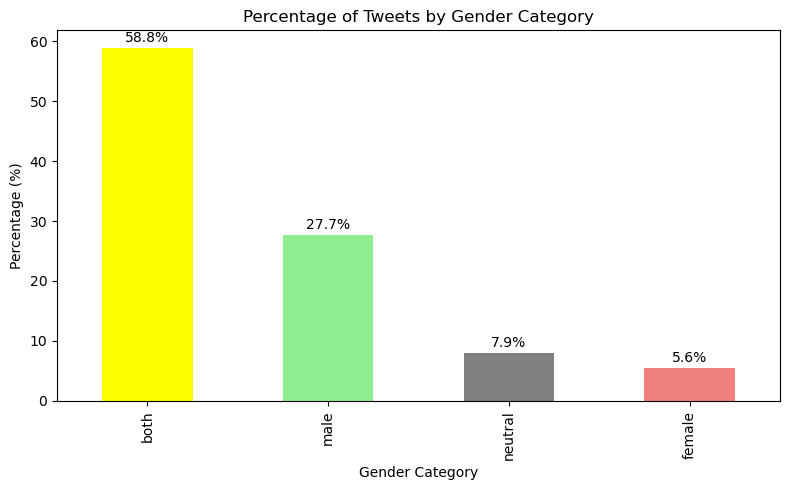

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the classified tweets
df = pd.read_csv("classified_tweets.csv")

# Count and convert to percentage
category_counts = df['gender_category'].value_counts()
category_percentages = (category_counts / category_counts.sum()) * 100

# Map specific colors to gender categories
color_map = {
    'male': 'lightgreen',
    'female': 'lightcoral',     # or 'salmon' / 'deeppink'
    'neutral': 'gray',
    'both': 'yellow',
    'unknown': 'lightblue'
}

# Get colors in correct order
bar_colors = [color_map.get(cat, 'black') for cat in category_percentages.index]

# Plot
plt.figure(figsize=(8, 5))
category_percentages.plot(kind='bar', color=bar_colors)

plt.title('Percentage of Tweets by Gender Category')
plt.xlabel('Gender Category')
plt.ylabel('Percentage (%)')

# Add labels
for i, val in enumerate(category_percentages):
    plt.text(i, val + 1, f'{val:.1f}%', ha='center')

plt.tight_layout()
plt.show()



In [19]:
!pip install -q sentence-transformers pandas scikit-learn


In [33]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
df = pd.read_csv('C:/Users/HP/classified_tweets.csv')

# Ensure relevant columns
df = df[['tweet', 'gender_category']]
df['gender_category'] = df['gender_category'].str.lower()

# Load SBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Compute SBERT embeddings
print("🔄 Generating SBERT embeddings...")
df['embedding'] = df['tweet'].apply(lambda x: model.encode(x))

# Split by category
male_tweets = df[df['gender_category'] == 'male']
female_tweets = df[df['gender_category'] == 'female']
neutral_tweets = df[df['gender_category'] == 'neutral']
both_tweets = df[df['gender_category'] == 'both']

# Compute centroids for male and female
male_centroid = np.mean(np.stack(male_tweets['embedding']), axis=0)
female_centroid = np.mean(np.stack(female_tweets['embedding']), axis=0)

# Function to classify tweet by cosine similarity to centroids
def classify_by_centroid(embedding):
    sim_male = cosine_similarity([embedding], [male_centroid])[0][0]
    sim_female = cosine_similarity([embedding], [female_centroid])[0][0]
    return 'male' if sim_male > sim_female else 'female'

# Classify 'both' tweets only
print("🔍 Reclassifying 'both' tweets...")
both_tweets['embedding'] = both_tweets['embedding'].apply(lambda x: np.array(x))
both_tweets['gender_category'] = both_tweets['embedding'].apply(classify_by_centroid)

# Combine back: keep 'neutral' as-is, reclassified 'both', original male/female
final_df = pd.concat([male_tweets, female_tweets, neutral_tweets, both_tweets], ignore_index=True)

# Drop embeddings column before saving
final_df.drop(columns=['embedding'], inplace=True)

# Save final result
final_df.to_csv('la_reclassified.csv', index=False)
print("✅ Saved reclassified dataset to 'la_reclassified.csv'")



🔄 Generating SBERT embeddings...


C:\Users\HP\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


🔍 Reclassifying 'both' tweets...


C:\Users\HP\AppData\Local\Temp\ipykernel_21996\3766108790.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  both_tweets['embedding'] = both_tweets['embedding'].apply(lambda x: np.array(x))


✅ Saved reclassified dataset to 'la_reclassified.csv'


C:\Users\HP\AppData\Local\Temp\ipykernel_21996\3766108790.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  both_tweets['gender_category'] = both_tweets['embedding'].apply(classify_by_centroid)


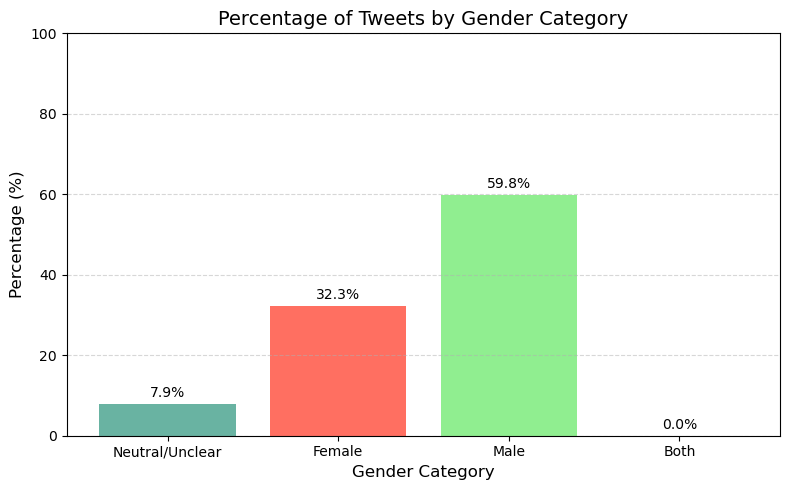

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV (update path if needed)
df = pd.read_csv('C:/Users/HP/la_reclassified.csv')

# Standardize column names
df.columns = df.columns.str.lower().str.strip()

# Check column names and preview
assert 'gender_category' in df.columns, "Gender column not found!"
assert 'tweet' in df.columns, "Tweet column not found!"

# Count the tweets per gender category
gender_counts = df['gender_category'].value_counts(normalize=True).sort_index() * 100

# Define colors consistent with the reference chart
color_map = {
    'Neutral/Unclear': '#69b3a2',  # light blue
    'Female': '#ff6f61',           # salmon/red
    'Male': '#90ee90',             # light green
    'Both': '#ffd700'              # gold/yellow
}

# Fix capitalization if needed
gender_labels = {
    'neutral': 'Neutral/Unclear',
    'neutral/unclear': 'Neutral/Unclear',
    'female': 'Female',
    'male': 'Male',
    'both': 'Both'
}

# Normalize label names
df['gender_category'] = df['gender_category'].str.lower().str.strip()
df['gender_category'] = df['gender_category'].map(gender_labels)

# Recalculate with cleaned labels
gender_percentages = df['gender_category'].value_counts(normalize=True).sort_index() * 100

# Prepare data for plotting
categories = ['Neutral/Unclear', 'Female', 'Male', 'Both']
values = [gender_percentages.get(cat, 0) for cat in categories]
colors = [color_map[cat] for cat in categories]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(categories, values, color=colors)

# Add percentage labels on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}%', 
             ha='center', va='bottom', fontsize=10)

# Style
plt.ylabel("Percentage (%)", fontsize=12)
plt.xlabel("Gender Category", fontsize=12)
plt.title("Percentage of Tweets by Gender Category", fontsize=14)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [37]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from itertools import combinations
from tqdm import tqdm
tqdm.pandas()

# Load classified dataset
df = pd.read_csv("C:/Users/HP/la_reclassified.csv")

# Load SBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Compute embeddings for all tweets
print("🔄 Encoding tweets...")
df['embedding'] = df['tweet'].progress_apply(lambda x: model.encode(x))


🔄 Encoding tweets...


C:\Users\HP\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
100%|██████████| 933/933 [00:40<00:00, 22.78it/s]


In [39]:
def compute_pairwise_similarity(df_group, label):
    embeddings = list(df_group['embedding'])
    tweets = list(df_group['tweet'])
    
    results = []
    
    print(f"\n🔍 Computing similarities for {label} group ({len(embeddings)} tweets)...")
    for i, j in tqdm(combinations(range(len(embeddings)), 2), total=(len(embeddings)*(len(embeddings)-1))//2):
        sim_score = cosine_similarity([embeddings[i]], [embeddings[j]])[0][0]
        results.append({
            'tweet1': tweets[i],
            'tweet2': tweets[j],
            'similarity': sim_score,
            'gender_category': label
        })
        
    return pd.DataFrame(results)


In [41]:
# Separate by category
male_df = df[df['gender_category'] == 'male']
female_df = df[df['gender_category'] == 'female']
neutral_df = df[df['gender_category'] == 'neutral']

# Compute pairwise similarities
male_sim = compute_pairwise_similarity(male_df, 'male')
female_sim = compute_pairwise_similarity(female_df, 'female')
neutral_sim = compute_pairwise_similarity(neutral_df, 'neutral')



🔍 Computing similarities for male group (558 tweets)...


100%|██████████| 155403/155403 [02:27<00:00, 1050.20it/s]



🔍 Computing similarities for female group (301 tweets)...


100%|██████████| 45150/45150 [00:39<00:00, 1137.08it/s]



🔍 Computing similarities for neutral group (74 tweets)...


100%|██████████| 2701/2701 [00:02<00:00, 1044.27it/s]


In [43]:
# Save each to CSV
male_sim.to_csv("male_pairwise_similarity.csv", index=False)
female_sim.to_csv("female_pairwise_similarity.csv", index=False)
neutral_sim.to_csv("neutral_pairwise_similarity.csv", index=False)

print("✅ All pairwise similarities saved.")


✅ All pairwise similarities saved.


In [45]:
pip install networkx numpy pandas


In [65]:
import pandas as pd
import networkx as nx

# Load pairwise similarity for each group
male_sim = pd.read_csv("male_pairwise_similarity.csv")
female_sim = pd.read_csv("female_pairwise_similarity.csv")
neutral_sim = pd.read_csv("neutral_pairwise_similarity.csv")

# Function to apply weighted LexRank on a given group
def weighted_lexrank(df_sim, num_sentences=45, threshold=0.5):
    # Create graph
    G = nx.Graph()
    
    # Add edges above the threshold
    for _, row in df_sim.iterrows():
        if row['similarity'] >= threshold:
            G.add_edge(row['tweet1'], row['tweet2'], weight=row['similarity'])
    
    # Apply PageRank (Weighted LexRank)
    scores = nx.pagerank(G, weight='weight')
    
    # Sort by score and select top N
    ranked_sentences = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    summary = [sent for sent, _ in ranked_sentences[:num_sentences]]
    return summary


In [67]:
male_summary = weighted_lexrank(male_sim)
female_summary = weighted_lexrank(female_sim)
neutral_summary = weighted_lexrank(neutral_sim)

# Optionally print or save summaries
print("\n🧔 Male Summary:\n", "\n".join(male_summary))
print("\n👩 Female Summary:\n", "\n".join(female_summary))
print("\n⚪ Neutral Summary:\n", "\n".join(neutral_summary))

# Save summaries
with open("male_summary.txt", "w", encoding="utf-8") as f:
    f.write("\n".join(male_summary))

with open("female_summary.txt", "w", encoding="utf-8") as f:
    f.write("\n".join(female_summary))

with open("neutral_summary.txt", "w", encoding="utf-8") as f:
    f.write("\n".join(neutral_summary))



🧔 Male Summary:
 you support # abortion ? never had an abortion ? you 'll still have to give account to your creator for the taking of innocent life . # semst
@ saadoescatholic : # americans have the right to # life # liberty and the # pursuitofhappiness , so why dont # unborn americans ? # semst
we are the # prolifegen and we will abolish abortion in our lifetime ! # prolifefuture # tcot # semst
@ violencehurts @ womencansee the most fundamental right of them all , the right to life , is also a right of the unborn . # semst
okay so how about declaring and protecting equality for the unborn now ? # scotus # murder # semst
just remember , there is a living family out there just waiting to # adopt your aborted baby . # semst
@ abelitomiranda ... about the millions of aborted children ? lets fix this too # lovewins # semst
@ violencehurts @ womencansee the unborn also have rights # defendthe8th # semst
if you want # equality then let all the babies live ! ! # semst
life , what a beautifu

In [69]:
pip install sentence-transformers networkx numpy


Note: you may need to restart the kernel to use updated packages.


In [71]:
# Assuming you already have individual summaries
all_summaries = male_summary + female_summary + neutral_summary
print(f"Total summary sentences: {len(all_summaries)}")


Total summary sentences: 135


In [73]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Load BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode all sentences
embeddings = model.encode(all_summaries, convert_to_tensor=False)

# Compute cosine similarity
sim_matrix = cosine_similarity(embeddings)


C:\Users\HP\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


In [75]:
import networkx as nx

def weighted_lexrank_from_matrix(sentences, sim_matrix, threshold=0.39, num_sentences=45):
    G = nx.Graph()

    # Add nodes
    for idx, sentence in enumerate(sentences):
        G.add_node(idx, sentence=sentence)

    # Add edges with weight >= threshold
    for i in range(len(sentences)):
        for j in range(i+1, len(sentences)):
            if sim_matrix[i][j] >= threshold:
                G.add_edge(i, j, weight=sim_matrix[i][j])
    
    # Apply weighted PageRank
    scores = nx.pagerank(G, weight='weight')

    # Rank and return top sentences
    ranked = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    summary = [sentences[i] for i, _ in ranked[:num_sentences]]
    return summary


In [77]:
combined_summary = weighted_lexrank_from_matrix(all_summaries, sim_matrix)

# Output or save result
print("\n📝 Combined Fair Summary:\n")
print("\n".join(combined_summary))

with open("combined_fair_summary.txt", "w", encoding="utf-8") as f:
    f.write("\n".join(combined_summary))



📝 Combined Fair Summary:

so ready for my abortion debate # semst
now the matter of abortion comes next . # semst
you support # abortion ? never had an abortion ? you 'll still have to give account to your creator for the taking of innocent life . # semst
life , what a beautiful choice . adoption . not abortion . # semst
rt @ spicysandwich : say it again for me one time ! anti-abortion laws only lead to unsafe , illegal abortions ! # semst
we are the # prolifegen and we will abolish abortion in our lifetime ! # prolifefuture # tcot # semst
@ showtruth keeping pregnant people safe is a great reason for abortion , though . # semst
what a great day to argue the benefits of making abortion legal # semst
there 's a gray area when it comes to abortion . we discuss the # legal & # ethical # dilemmas that # doctors & # patients face regarding # semst
i 'm pro choice for if you want to kill living babies , go right ahead . # semst
. @ rebeccahlouise i 'm not forcing anyone to do anything . abo

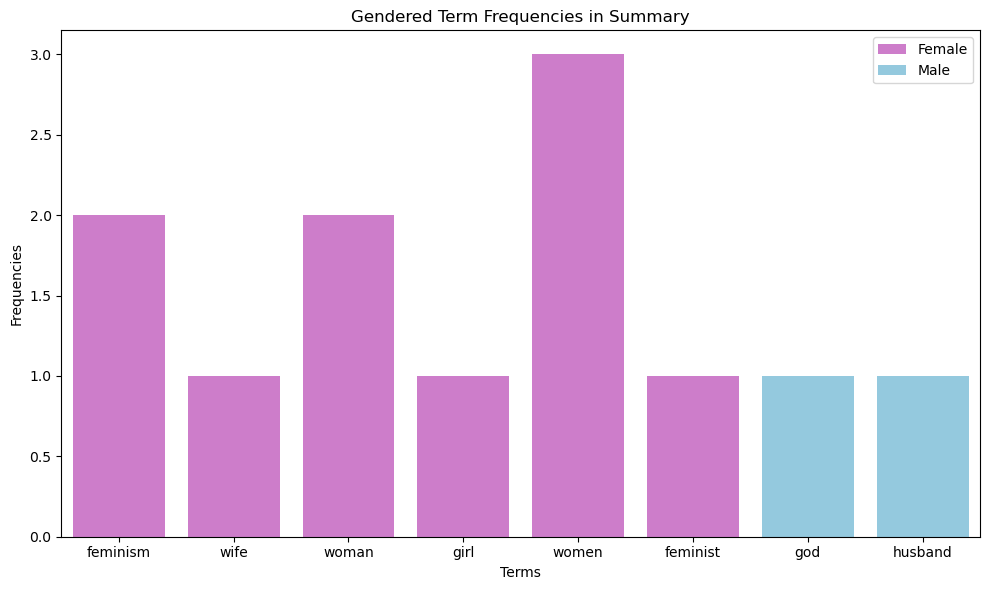

🟣 Unique Female Terms and Frequencies:
  feminism: 2
  wife: 1
  woman: 2
  girl: 1
  women: 3
  feminist: 1

🔵 Unique Male Terms and Frequencies:
  god: 1
  husband: 1

🧮 Weighted Female Score: 10
🧮 Weighted Male Score: 2
📊 Bias Score (female - male): 0.67
🟣 Summary is biased toward females.


C:\Users\HP\AppData\Local\Temp\ipykernel_21996\21021053.py:175: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Weighted Inclusion Bias', data=df, palette=["#609db0", "#fdac84"])


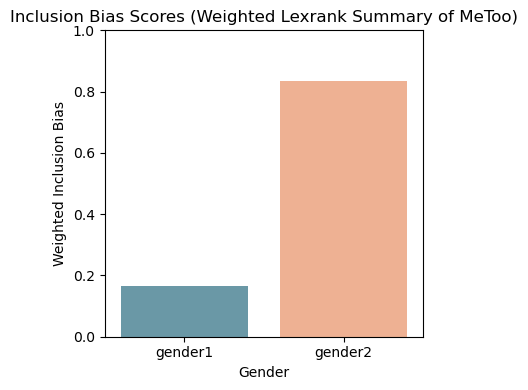

In [91]:
# 📌 Cell 1: Import necessary libraries
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 📌 Cell 2: Define gendered term sets (reuse your sets or load from external file if needed)
male_terms = {'god', 'gods', 'nephew', 'nephews', 'him', 'baron', 'father', 'fathers' 'dukes', 'dad', 'beau', 'beaus', 'daddies',
        'policeman', 'policemen', 'grandfather', 'landlord', 'landlords', 'monk', 'monks', 'step-son', 'step-sons', 
        'milkmen', 'chairmen', 'chairman', 'steward', 'men', 'masseurs', 'son-in-law', 'priest', 'king', 'governor', 
        'waiter', 'daddy', 'steward', 'emperor', 'son', 'proprietor', 'groom', 'grooms', 'gentleman', 'gentlemen', 'sir', 
        'wizards', 'sorcerer', 'lad','milk-man', 'grandson', 'grand-son','congressmen','dads', 'manager', 'prince', 'stepfathers', 
        'boyfriend', 'shepherd', 'shepherds', 'males', 'grandfathers', 'grand-fathers', 'husband', 'usher', 'postman','stags', 
        'husbands', 'host', 'boy', 'waiter', 'bachelor', 'bachelors', 'businessmen', 'duke', 'sirs', 'papas', 'heir', 'uncle', 
        'princes', 'fiance', 'mr', 'count', 'lords', 'father-in-law', 'actor', 'actors', 'postmaster', 'headmaster', 'heroes',
        'businessman', 'boars','wizard', 'sons-in-law', 'fiances', 'uncles', 'hunter', 'lads', 'masters', 'brother', 
        'hosts', 'poet', 'hero', 'grandpa', 'grandpas','manservant', 'heirs', 'male', 'tutors', 'millionaire',
        'congressman', 'sire', 'sires', 'widower','grandsons', 'grand-sons','boys', 'he', 'step-father', 'jewess', 'bridegroom', 'bridegrooms'
        'stepfather', 'widowers', 'abbot', 'mr.,' 'brothers', 'man', 'sons', 'boyfriends', 'he’s', 'his', 'earl', 
        'giant', 'stepson', 'stepsons', 'poet', 'mayor', 'peer', 'negro', 'abbot', 'traitor', 'benefactor',
        'instructor', 'conductor', 'founder', 'founders', 'hunters', 'huntresses', 'tempt', 'enchanter', 'enchanters', 'songster', 
        'songsters', 'murderer', 'murderers', 'patron', 'patrons', 'author', 'czar', 'guy', 'spokesman', 'spokesmen',
        'pa', 'councilman', 'council-man', 'councilmen', 'council-men', 'gay', 'gays', 'prostate cancer', 'fraternity', 'fraternities', 'salesman', 'dude', 'dudes', 'paternal',
        'brotherhood', 'statesman', 'statesmen', 'countryman', 'countrymen', 'suitor', 'macho', 'papa', 'strongman', 'strongmen',
        'boyhood', 'manhood', 'masculine', 'macho', 'horsemen', 'brethren', 'chap','chaps', 'schoolboy', 'schoolboys', 'bloke',
        'blokes', 'patriarch', 'patriachy', 'fatherhood', 'hubby', 'hubbies', 'fella', 'fellas', 'handyman', 'fraternal', 
        'bro', 'masculinity', 'ballerino', 'pappy', 'papi', 'pappies', 'dada', 'bf', 'bfs', 'knights', 'knight', 
        'menfolk', 'brotherly', 'manly', 'pimp', 'pimps', 'homeboy', 'homeboys','grandnephew', 'grand-nephew',
        'grand-nephew', 'grand-nephews', 'john doe', 'nobleman', 'noblemen', 'dream boy', 'himself', 'gramps'}  # Paste your full male_terms set here
female_terms = {'goddesses', 'niece', 'baroness', 'mother', 'duchesses', 'mom', 'belle', 'belles', 'mummies', 'policewoman',
          'grandmother', 'landlady', 'landladies', 'nuns', 'stepdaughter', 'milkmaids', 'chairwomen', 'stewardesses',
          'women', 'masseuses', 'daughter-in-law', 'priestesses', 'stewardess', 'empress', 'daughter', 'queens',
          'proprietress', 'brides', 'lady', 'queen', 'matron', 'waitresses', 'mummy', 'empresses', 'madam', 
          'witches', 'sorceress', 'lass', 'milkmaid', 'granddaughter', 'grand-daughter', 'congresswomen','moms', 'manageress', 
          'princess', 'stepmothers', 'stepdaughters', 'girlfriend', 'shepherdess', 'females', 'grand-mothers', 'grandmothers'
          'step-daughter', 'nieces', 'priestess', 'wife', 'mothers', 'usherette', 'postwoman', 'hinds', 'wives', 
          'murderess', 'hostess', 'girl', 'waitress', 'spinster', 'shepherdess', 'businesswomen', 'duchess', 'madams', 'mamas',
          'nun', 'heiress', 'aunt', 'princesses', 'fiancee', 'mrs', 'ladies', 'mother-in-law', 'actress', 'actresses', 
          'postmistress', 'headmistress', 'heroines', 'bride', 'businesswoman', 'baronesses', 'sows', 'witch',
          'daughters-in-law','aunts', 'huntress', 'lasses', 'mistress', 'mistresses', 'sister', 'hostesses', 'poetess', 
          'masseuse', 'heroine', 'goddess','grandma', 'grandmas', 'maidservant', 'heiresses', 'patroness',
          'female', 'governesses', 'millionairess', 'congresswoman', 'dam', 'widow', 'granddaughters', 'grand-daughters', 'headmistresses', 
          'girls', 'she', 'policewomen', 'step-mother','stepmother', 'widows', 'abbess', 'mrs.', 'chairwoman', 'sisters',
          'mama', 'woman','daughters', 'girlfriends', 'she’s', 'her', 'maid', 'countess', 'giantess', 'poetess', 'jew',
          'mayoress', 'peeress', 'negress', 'abbess', 'traitress', 'benefactress', 'instructress', 'conductress', 'founder',
          'huntress', 'temptress', 'enchantress', 'songstress', 'murderess', 'murderesses', 'patronesses', 'authoress', 'czarina',
          'spokeswoman', 'spokeswomen', 'ma', 'councilwoman', 'council-woman', 'councilwomen', 'council-women', 'mum', 'lesbian', 'lesbians', 'breast', 'breasts'
          'maiden', 'maidens', 'sorority', 'sororities', 'saleswoman', 'dudette', 'maternal', 'feminist', 'feminists', 'sisterhood', 
          'housewife', 'housewives', 'stateswoman', 'stateswomen', 'countrywoman', 'countrywomen', 'chick', 'chicks', 'mommy',
          'strongwoman', 'strongwomen', 'babe', 'babes', 'diva', 'divas', 'feminine', 'feminism', 'gal', 'gals', 'sistren', 'schoolgirl',
          'schoolgirls', 'matriarch', 'matriarchy', 'motherhood', 'wifey', 'sis', 'femininity', 'ballerina', 'ballerinas', 'granny', 
          'grannies', 'mami', 'momma', "ma'am", 'gf', 'gfs', 'damsel', 'damsels', 'vixen', 'vixens', 'nan', 'nanny', 'nannies',
          'auntie', 'womenfolk', 'sisterly', 'motherly', 'homegirl', 'homegirls', 'grand-neice', 'grand-neices',
          'grandneice', 'grandneices', 'jane doe', 'noblewoman', 'noblewomen', 'dream girl', 'madame', 'herself', 'hers'}  


def calculate_weighted_bias(summary, male_terms, female_terms):
    # If summary is a list, join it into a single string
    if isinstance(summary, list):
        summary = ' '.join(summary)
        
    summary = summary.lower()
    words = summary.split()
    word_freq = Counter(words)

    # Filter and display frequencies of gendered terms
    female_freqs = {term: freq for term, freq in word_freq.items() if term in female_terms}
    male_freqs = {term: freq for term, freq in word_freq.items() if term in male_terms}

    all_terms = list(female_freqs.keys()) + list(male_freqs.keys())
    all_freqs = list(female_freqs.values()) + list(male_freqs.values())
    categories = ['Female'] * len(female_freqs) + ['Male'] * len(male_freqs)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=all_terms, y=all_freqs, hue=categories, palette={'Female': 'orchid', 'Male': 'skyblue'})
    plt.title("Gendered Term Frequencies in Summary")
    plt.xlabel("Terms")
    plt.ylabel("Frequencies")
    plt.tight_layout()
    plt.show()

    print("🟣 Unique Female Terms and Frequencies:")
    for term, freq in female_freqs.items():
        print(f"  {term}: {freq}")

    print("\n🔵 Unique Male Terms and Frequencies:")
    for term, freq in male_freqs.items():
        print(f"  {term}: {freq}")
        female_score = sum(freq for freq in female_freqs.values())
    male_score = sum(freq for freq in male_freqs.values())

    total = female_score + male_score
    if total > 0:
        female_ratio = female_score / total
        male_ratio = male_score / total
        bias_score = female_ratio - male_ratio
    else:
        female_ratio = male_ratio = bias_score = 0

    print(f"\n🧮 Weighted Female Score: {female_score}")
    print(f"🧮 Weighted Male Score: {male_score}")
    print(f"📊 Bias Score (female - male): {bias_score:.2f}")

    if bias_score > 0:
        print("🟣 Summary is biased toward females.")
    elif bias_score < 0:
        print("🔵 Summary is biased toward males.")
    else:
        print("⚪ Summary appears neutral.")

    return female_ratio, male_ratio

 

# 📌 Cell 4: Combined Fair Summary for Abortion Analysis
combined_summary = [
    "so ready for my abortion debate # semst",
    "now the matter of abortion comes next . # semst",
    "you support # abortion ? never had an abortion ? you 'll still have to give account to your creator for the taking of innocent life . # semst",
    "life , what a beautiful choice . adoption . not abortion . # semst",
    "rt @ spicysandwich : say it again for me one time ! anti-abortion laws only lead to unsafe , illegal abortions ! # semst",
    "we are the # prolifegen and we will abolish abortion in our lifetime ! # prolifefuture # tcot # semst",
    "@ showtruth keeping pregnant people safe is a great reason for abortion , though . # semst",
    "what a great day to argue the benefits of making abortion legal # semst",
    "there 's a gray area when it comes to abortion . we discuss the # legal & # ethical # dilemmas that # doctors & # patients face regarding # semst",
    "i 'm pro choice for if you want to kill living babies , go right ahead . # semst",
    ". @ rebeccahlouise i 'm not forcing anyone to do anything . abortion is not 'medical help ' & there are better options . very proud to be # semst",
    "@ prolifeyouth precisely ! in god 's eyes , all life is precious . let 's make this generation the one who ends abortion ! # prolifeyouth # semst",
    "@ prolife_wife you can say that again ! # abortionismurder # alllivesmatter # prolifeyouth # semst",
    "@ notmuchelse and the unborn are human lives completely human & alive from conception . abortion kills # semst",
    "@ paigeymadisonn : 12. something you hate . people who do n't believe abortion should be kept safe and sterile . # semst",
    "@ prolifeliberty yes , your reasoning is horrible . we were talking about abortion , not death . # semst",
    "abortion has nothing to do with feminism . its about the babys body , not yours.isright # semst",
    "abortion is on the wrong side of history : healers , inventors , artists , your wife , your husband , your best friend , all eliminated . # semst",
    "just remember , there is a living family out there just waiting to # adopt your aborted baby . # semst",
    "@ saadoescatholic : # americans have the right to # life # liberty and the # pursuitofhappiness , so why dont # unborn americans ? # semst",
    "# prolifeyouth know that life begins at conception . # semst",
    "damn , interesting news when you find out you were almost a product of abortion # semst",
    "rt @ gbforchoice : when is abortion a responsible choice ? when a woman chooses it to be # semst",
    "@ dardenmba as a former fetus i oppose # prolifeyouth # semst",
    "it should never ever be legal to have an abortion because murder is wrong & # abortionismurder not # healthcare . we must . # semst",
    "the world is waking up to the fact that killing babies is wrong . no matter what . # prolifeyouth # semst",
    "@ violencehurts @ womencansee the most fundamental right of them all , the right to life , is also a right of the unborn . # semst",
    "we are people who believe every child is entitled to life and liberty ... . - @ barackobama yet abortion is still legal . # semst",
    "so can unborn children have rights now ? # semst",
    "@ libertybleeds every one in congress should attend an abortion procedure especially partial birth that they vote for # ccot # tcot # semst",
    "@ violencehurts @ womencansee the unborn also have rights # defendthe8th # semst",
    "@ esmerald_kiczek rock on girl ! we all know # abortionismurder . # semst",
    "forced reproduction is a human rights violation . # feminism # abortionrights # semst",
    "planned parenthood lines its pockets while sacrificing women and children in need at the altar of abortion . # semst",
    "some babies die by chance , none should die by choice ! # semst",
    "@ ghhshirley abortion workers charged with manslaughter after another woman dies from # semst",
    "murdering an unborn child is the crudest form of contraception ! # catholic # christian # conservative # feminist # semst",
    "# rally4life because if they do n't want an abortion , then no one can have the choice # semst",
    "@ notmuchelse giving birth is not pushing women toward death . # semst",
    "babies are humans to support the prolife movement # semst",
    "you ca n't say you support women 's rights but be against abortion # semst",
    "pro choice ? just choose to kill yourself after your baby is born . # semst",
    "so prolifers are against health rights ? # semst",
    "re last : i ca n't get past this ... why must abortion providers dismember a fetus alive ? that just sounds ... hideously inhumane . # semst",
    "just laid down the law on abortion in my bioethics class . # catholic # semst"
]

female_ratio, male_ratio = calculate_weighted_bias(combined_summary, male_terms, female_terms)

import pandas as pd

data = {
    'Gender': ['gender1', 'gender2'],
    'Weighted Inclusion Bias': [male_ratio, female_ratio]
}
df = pd.DataFrame(data)

plt.figure(figsize=(4, 4))
sns.barplot(x='Gender', y='Weighted Inclusion Bias', data=df, palette=["#609db0", "#fdac84"])
plt.title('Inclusion Bias Scores (Weighted Lexrank Summary of MeToo)')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()





=== Gender Term Frequencies ===
Female Terms:
  females: 2
  wife: 4
  girls: 3
  girl: 4
  lady: 4
  mom: 8
  mothers: 5
  feminist: 6
  female: 1
  her: 34
  daughter: 3
  moms: 1
  feminists: 2
  she: 19
  women: 80
  housewife: 1
  feminism: 7
  mother: 12
  woman: 35
  motherhood: 3
  nuns: 1

Male Terms:
  sir: 1
  bro: 1
  father: 2
  peer: 1
  him: 3
  he: 17
  husband: 1
  males: 1
  boys: 1
  hero: 1
  sons: 1
  congressman: 1
  monk: 1
  gay: 9
  dude: 1
  mayor: 1
  male: 1
  man: 8
  men: 19
  gays: 2
  his: 8
  murderer: 1
  gods: 3
  author: 1
  god: 37

=== Bias Summary ===
Weighted Female Score: 235
Weighted Male Score: 123
Bias Score (female - male): 0.31
🟣 Dataset is biased toward females.


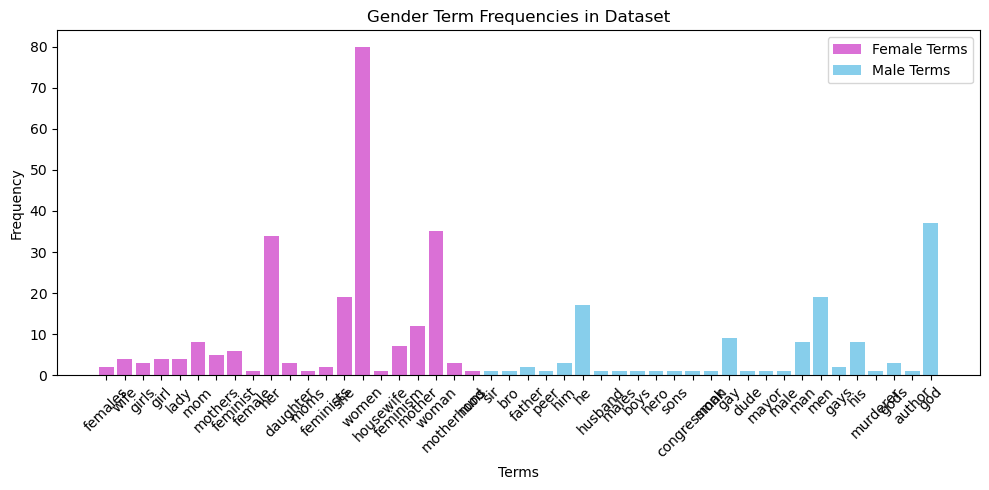

In [87]:
import pandas as pd
import re

# Load the dataset
df = pd.read_csv("C:/Users/HP/Downloads/la (1).csv")

# Define gender-specific keywords
female_keywords = {
    'goddesses', 'niece', 'baroness', 'mother', 'duchesses', 'mom', 'belle', 'belles', 'mummies', 'policewoman',
          'grandmother', 'landlady', 'landladies', 'nuns', 'stepdaughter', 'milkmaids', 'chairwomen', 'stewardesses',
          'women', 'masseuses', 'daughter-in-law', 'priestesses', 'stewardess', 'empress', 'daughter', 'queens',
          'proprietress', 'brides', 'lady', 'queen', 'matron', 'waitresses', 'mummy', 'empresses', 'madam', 
          'witches', 'sorceress', 'lass', 'milkmaid', 'granddaughter', 'grand-daughter', 'congresswomen','moms', 'manageress', 
          'princess', 'stepmothers', 'stepdaughters', 'girlfriend', 'shepherdess', 'females', 'grand-mothers', 'grandmothers'
          'step-daughter', 'nieces', 'priestess', 'wife', 'mothers', 'usherette', 'postwoman', 'hinds', 'wives', 
          'murderess', 'hostess', 'girl', 'waitress', 'spinster', 'shepherdess', 'businesswomen', 'duchess', 'madams', 'mamas',
          'nun', 'heiress', 'aunt', 'princesses', 'fiancee', 'mrs', 'ladies', 'mother-in-law', 'actress', 'actresses', 
          'postmistress', 'headmistress', 'heroines', 'bride', 'businesswoman', 'baronesses', 'sows', 'witch',
          'daughters-in-law','aunts', 'huntress', 'lasses', 'mistress', 'mistresses', 'sister', 'hostesses', 'poetess', 
          'masseuse', 'heroine', 'goddess','grandma', 'grandmas', 'maidservant', 'heiresses', 'patroness', 'female', 'governesses', 'millionairess', 'congresswoman', 'dam', 'widow', 'granddaughters', 'grand-daughters', 'headmistresses', 
          'girls', 'she', 'policewomen', 'step-mother','stepmother', 'widows', 'abbess', 'mrs.', 'chairwoman', 'sisters',
          'mama', 'woman','daughters', 'girlfriends', 'she’s', 'her', 'maid', 'countess', 'giantess', 'poetess', 'jew',
          'mayoress', 'peeress', 'negress', 'abbess', 'traitress', 'benefactress', 'instructress', 'conductress', 'founder',
          'huntress', 'temptress', 'enchantress', 'songstress', 'murderess', 'murderesses', 'patronesses', 'authoress', 'czarina',
          'spokeswoman', 'spokeswomen', 'ma', 'councilwoman', 'council-woman', 'councilwomen', 'council-women', 'mum', 'lesbian', 'lesbians', 'breast', 'breasts'
          'maiden', 'maidens', 'sorority', 'sororities', 'saleswoman', 'dudette', 'maternal', 'feminist', 'feminists', 'sisterhood', 
          'housewife', 'housewives', 'stateswoman', 'stateswomen', 'countrywoman', 'countrywomen', 'chick', 'chicks', 'mommy',
          'strongwoman', 'strongwomen', 'babe', 'babes', 'diva', 'divas', 'feminine', 'feminism', 'gal', 'gals', 'sistren', 'schoolgirl',
          'schoolgirls', 'matriarch', 'matriarchy', 'motherhood', 'wifey', 'sis', 'femininity', 'ballerina', 'ballerinas', 'granny', 
          'grannies', 'mami', 'momma', "ma'am", 'gf', 'gfs', 'damsel', 'damsels', 'vixen', 'vixens', 'nan', 'nanny', 'nannies',
          'auntie', 'womenfolk', 'sisterly', 'motherly', 'homegirl', 'homegirls', 'grand-neice', 'grand-neices',
          'grandneice', 'grandneices', 'jane doe', 'noblewoman', 'noblewomen', 'dream girl', 'madame', 'herself', 'hers'
}
male_keywords = {
    'god', 'gods', 'nephew', 'nephews', 'him', 'baron', 'father', 'fathers' 'dukes', 'dad', 'beau', 'beaus', 'daddies',
        'policeman', 'policemen', 'grandfather', 'landlord', 'landlords', 'monk', 'monks', 'step-son', 'step-sons', 
        'milkmen', 'chairmen', 'chairman', 'steward', 'men', 'masseurs', 'son-in-law', 'priest', 'king', 'governor', 
        'waiter', 'daddy', 'steward', 'emperor', 'son', 'proprietor', 'groom', 'grooms', 'gentleman', 'gentlemen', 'sir', 
        'wizards', 'sorcerer', 'lad','milk-man', 'grandson', 'grand-son','congressmen','dads', 'manager', 'prince', 'stepfathers', 
        'boyfriend', 'shepherd', 'shepherds', 'males', 'grandfathers', 'grand-fathers', 'husband', 'usher', 'postman','stags', 
        'husbands', 'host', 'boy', 'waiter', 'bachelor', 'bachelors', 'businessmen', 'duke', 'sirs', 'papas', 'heir', 'uncle', 
        'princes', 'fiance', 'mr', 'count', 'lords', 'father-in-law', 'actor', 'actors', 'postmaster', 'headmaster', 'heroes',
        'businessman', 'boars','wizard', 'sons-in-law', 'fiances', 'uncles', 'hunter', 'lads', 'masters', 'brother', 
        'hosts', 'poet', 'hero', 'grandpa', 'grandpas','manservant', 'heirs', 'male', 'tutors', 'millionaire',
        'congressman', 'sire', 'sires', 'widower','grandsons', 'grand-sons','boys', 'he', 'step-father', 'jewess', 'bridegroom', 'bridegrooms'
        'stepfather', 'widowers', 'abbot', 'mr.,' 'brothers', 'man', 'sons', 'boyfriends', 'he’s', 'his', 'earl', 
        'giant', 'stepson', 'stepsons', 'poet', 'mayor', 'peer', 'negro', 'abbot', 'traitor', 'benefactor',
        'instructor', 'conductor', 'founder', 'founders', 'hunters', 'huntresses', 'tempt', 'enchanter', 'enchanters', 'songster', 
        'songsters', 'murderer', 'murderers', 'patron', 'patrons', 'author', 'czar', 'guy', 'spokesman', 'spokesmen',
        'pa', 'councilman', 'council-man', 'councilmen', 'council-men', 'gay', 'gays', 'prostate cancer', 'fraternity', 'fraternities', 'salesman', 'dude', 'dudes', 'paternal',
        'brotherhood', 'statesman', 'statesmen', 'countryman', 'countrymen', 'suitor', 'macho', 'papa', 'strongman', 'strongmen',
        'boyhood', 'manhood', 'masculine', 'macho', 'horsemen', 'brethren', 'chap','chaps', 'schoolboy', 'schoolboys', 'bloke',
        'blokes', 'patriarch', 'patriachy', 'fatherhood', 'hubby', 'hubbies', 'fella', 'fellas', 'handyman', 'fraternal', 
        'bro', 'masculinity', 'ballerino', 'pappy', 'papi', 'pappies', 'dada', 'bf', 'bfs', 'knights', 'knight', 
        'menfolk', 'brotherly', 'manly', 'pimp', 'pimps', 'homeboy', 'homeboys','grandnephew', 'grand-nephew',
        'grand-nephew', 'grand-nephews', 'john doe', 'nobleman', 'noblemen', 'dream boy', 'himself', 'gramps'
}

# Ensure the column name is correct
tweet_column = 'tweet'
df = df.dropna(subset=[tweet_column])  # Remove missing tweets

# Combine all tweets into one string
all_text = ' '.join(df[tweet_column].astype(str).tolist()).lower()

# Tokenize and count word frequency
word_freq = Counter(all_text.split())

# Extract and score gender-related terms
female_freqs = {term: word_freq[term] for term in female_terms if term in word_freq}
male_freqs = {term: word_freq[term] for term in male_terms if term in word_freq}

# Calculate scores
female_score = sum(female_freqs.values())
male_score = sum(male_freqs.values())
total_score = female_score + male_score

# Compute ratios and bias
if total_score > 0:
    female_ratio = female_score / total_score
    male_ratio = male_score / total_score
    bias_score = female_ratio - male_ratio
else:
    female_ratio = male_ratio = bias_score = 0

# Print details
print("=== Gender Term Frequencies ===")
print("Female Terms:")
for term, freq in female_freqs.items():
    print(f"  {term}: {freq}")
print("\nMale Terms:")
for term, freq in male_freqs.items():
    print(f"  {term}: {freq}")

print("\n=== Bias Summary ===")
print(f"Weighted Female Score: {female_score}")
print(f"Weighted Male Score: {male_score}")
print(f"Bias Score (female - male): {bias_score:.2f}")

if bias_score > 0:
    print("🟣 Dataset is biased toward females.")
elif bias_score < 0:
    print("🔵 Dataset is biased toward males.")
else:
    print("⚪ Dataset appears neutral.")
# Visualization
plt.figure(figsize=(10, 5))
plt.bar(female_freqs.keys(), female_freqs.values(), color='orchid', label='Female Terms')
plt.bar(male_freqs.keys(), male_freqs.values(), color='skyblue', label='Male Terms')
plt.title("Gender Term Frequencies in Dataset")
plt.xlabel("Terms")
plt.ylabel("Frequency")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

